In [2]:
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statistics
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
df = pd.read_csv('Offenses_NYC_2013.csv')
df.isnull().values.any() 


True

In [4]:
df = df.drop(df.index[216])
df.head(220)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0.0
7,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3.0
8,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1.0
9,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0.0


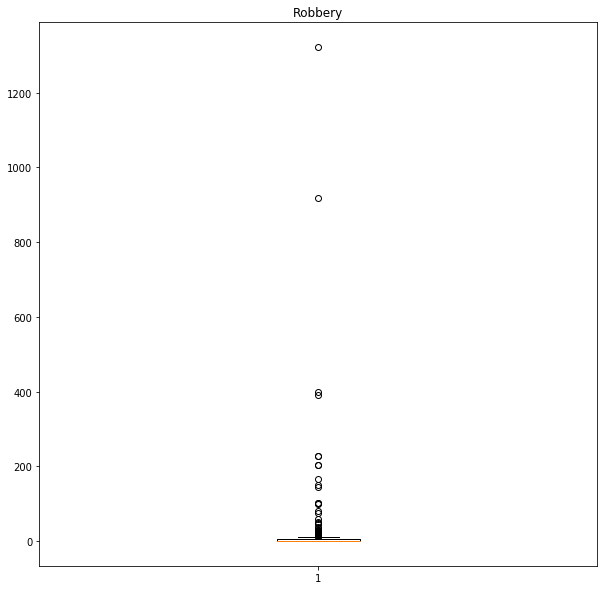

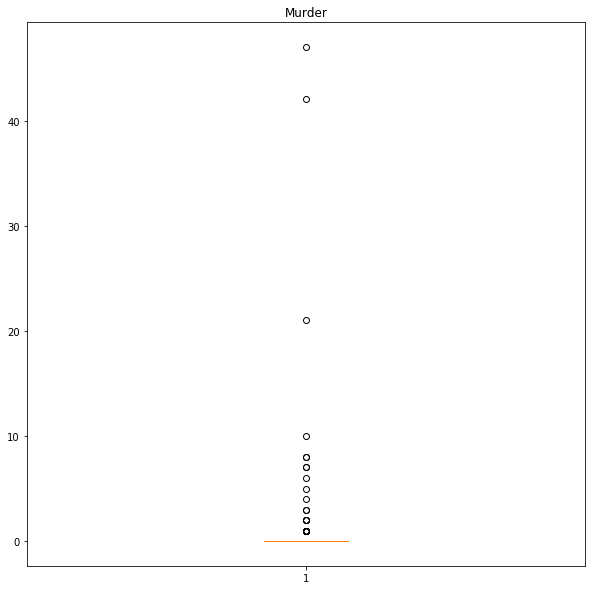

In [5]:
rob=df['Robbery']

plt.figure(figsize=(10, 10))
plt.boxplot(rob)
plt.title('Robbery')
plt.show()

murder=df['Murder and nonnegligent manslaughter']
plt.figure(figsize=(10, 10))
plt.boxplot(murder)
plt.title('Murder')
plt.show()

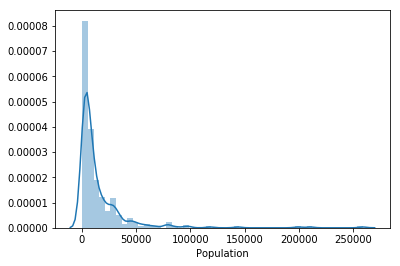

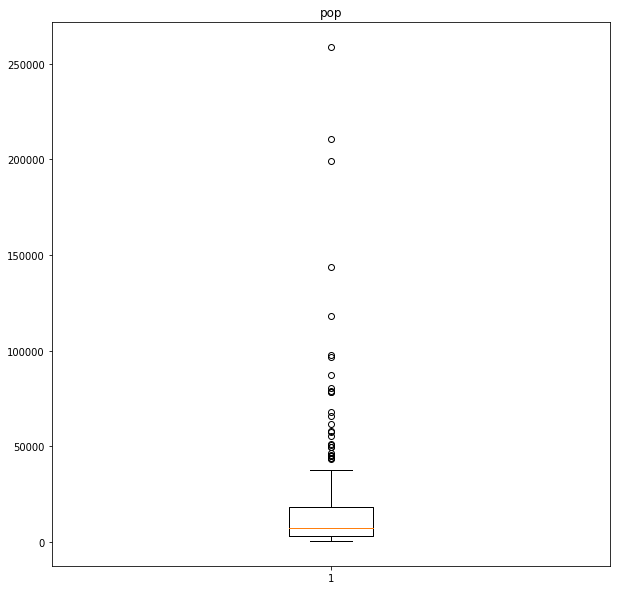

In [6]:
pop=df['Population']
sns.distplot(pop);
plt.figure(figsize=(10, 10))
plt.boxplot(pop)
plt.title('pop')

plt.show()

In [7]:
square=df['Population']**2
df['Population Squared']=square


In [8]:
count=0
rob=rob*1
for num in rob:
    if num > 0:
     rob[count]=1
    count +=1
df['rob']=rob

count=0
murder=murder*1
for num in murder:
    if num > 0:
     murder[count]=1
    count +=1
df['murder']=murder
     


In [9]:
burg=df['Burglary']
count=0
burg=burg*1
for num in burg:
    if num > 0:
     burg[count]=1
    count +=1
df['burglary']=burg

assault=df['Aggravated assault']
count=0
assault=assault*1
for num in assault:
    if num > 0:
     assault[count]=1
    count +=1
df['Agg. Assault']=assault

theft=df['Larceny-theft']
count=0
theft=theft*1
for num in theft:
    if num > 0:
     theft[count]=1
    count +=1
df['larceny']=theft

In [10]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,Population Squared,rob,murder,burglary,Agg. Assault,larceny
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0,3463321,0,0,1,0,1
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0,6640929,0,0,1,1,1
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0,8099716,0,0,1,1,1
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936,1,1,1,1,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,40806544,1,0,1,1,1


In [11]:
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['Population','Population Squared','rob','murder']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.48528205e-02  1.05304265e-07 -5.95081826e+00  7.15045327e+01]]

Intercept: 
 [28.64818207]

R-squared:
0.8468289044299453


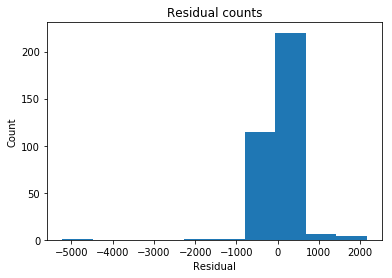

In [12]:
predicted = regr.predict(X).ravel()
actual = df['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

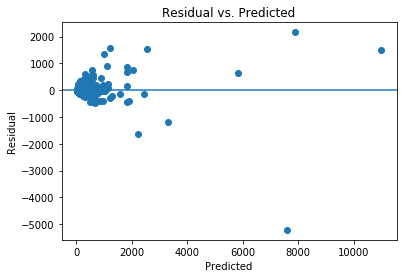

In [13]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

clf = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [15]:
x=predicted.reshape(-1, 1)
print(x)
print(Y)

[[   56.65398354]
 [   67.62321872]
 [   71.77224393]
 [ 2559.55900775]
 [  121.87428447]
 [   85.19122594]
 [   55.43507645]
 [ 3324.85310451]
 [  173.6231252 ]
 [  327.56337023]
 [   59.58485998]
 [   92.03093611]
 [   38.46693093]
 [   66.77678153]
 [  577.54813457]
 [   73.37162802]
 [  139.57328507]
 [  106.26112306]
 [  275.93432967]
 [  111.30964961]
 [  317.22723839]
 [  654.78049358]
 [ 1007.72560505]
 [   49.80001442]
 [  222.06322282]
 [   43.93775327]
 [   63.75022516]
 [   59.60014528]
 [   53.81747927]
 [   64.25664186]
 [  153.81337539]
 [  780.8852808 ]
 [  224.46913076]
 [  127.85749953]
 [   46.23053171]
 [10990.35903002]
 [  130.8903218 ]
 [   56.54727536]
 [   62.12510491]
 [  449.0587236 ]
 [  189.74994306]
 [  100.84598217]
 [   56.58800776]
 [  128.46810666]
 [   40.0271756 ]
 [  665.56852911]
 [   81.62686012]
 [   87.58039269]
 [   43.3050804 ]
 [   79.86063951]
 [   70.01206025]
 [   50.30687263]
 [   54.70437918]
 [ 1833.19442148]
 [  154.04485291]
 [  105.79

In [16]:
from sklearn.model_selection import cross_val_score




cross_val_score(bnb, x, Y, cv=5)



C:\Users\ihemb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ihemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ihemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ihemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

array([0.0083682 , 0.01538462, 0.03571429, 0.09090909, 0.25      ])

In [17]:
X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size=0.33, random_state=42)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(x, Y).score(x, Y)))

With 20% Holdout: 0.0
Testing on Sample: 0.01729106628242075


C:\Users\ihemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
features = ['Burglary','Aggravated assault','Larceny-theft','Robbery','Murder and nonnegligent manslaughter']
fx = df.loc[:, features].values
fx = StandardScaler().fit_transform(fx)

C:\Users\ihemb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
print(fx)

[[-0.2652445  -0.23377873 -0.40463994 -0.18840441 -0.16348706]
 [-0.26146463 -0.21045015 -0.39063828 -0.18840441 -0.16348706]
 [-0.26902437 -0.21045015 -0.39763911 -0.18840441 -0.16348706]
 ...
 [-0.22366592 -0.21822635 -0.35563413 -0.18840441 -0.16348706]
 [ 1.50373478  4.54857835  1.90843452  3.92397769  1.45737034]
 [-0.10271008 -0.13268825 -0.01679392 -0.16731527 -0.16348706]]


In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(fx)

In [21]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [22]:
regr = linear_model.LinearRegression()
Y = df['Property crime'].values.reshape(-1, 1)
X = principalDf[['principal component 1', 'principal component 2']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[461.59786371 604.25785756]]

Intercept: 
 [385.75216138]

R-squared:
0.9993308419954208
